# Ex 9

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial.transform import Rotation
from util_functions import (
    R,
    camera_intrinsic,
    fundamental_matrix,
)

In [45]:
# From week 3 exercise. But I don't think this is needed.
K = camera_intrinsic(1000, (300, 200))
R1 = np.eye(3)
t1 = np.array([[0, 0, 0]]).T
R2 = R(0.7, -0.5, 0.8)
t2 = np.array([[0.2, 2, 1]]).T
R2 = Rotation.from_euler("xyz", [0.7, -0.5, 0.8]).as_matrix()
F_true = fundamental_matrix(K, R1, t1, K, R2, t2)
print(f"F_true: {F_true}")

F_true: [[ 3.29311881e-07  8.19396327e-07  1.79162592e-03]
 [ 5.15532551e-07 -8.76915984e-07  9.31426656e-05]
 [-1.29882755e-03  1.51951700e-03 -1.10072682e+00]]


In [46]:
data = np.load("media/Fest_test.npy", allow_pickle=True).item()
q1 = data["q1"]
q2 = data["q2"]
Ftrue = data["Ftrue"]
print(f"q1: {q1}")
print(f"q2: {q2}")
print(f"Ftrue: {Ftrue}")

q1: [[192.80308677 383.84844629 552.40550165 395.55690526 416.17883753
  366.71606701 649.12832188 437.85457401]
 [482.655306   522.55261707 373.4083753  550.57520093 157.95394133
  379.58268042 141.20188192 571.00584606]
 [  1.           1.           1.           1.           1.
    1.           1.           1.        ]]
q2: [[ 77.42041221 254.60721249 469.08032639 278.08133782 308.0810652
  270.86822192 508.91666875 288.72429284]
 [479.74166846 521.16039433 373.38678026 549.34478578 157.66285399
  378.83939131 138.78418921 569.99677028]
 [  1.           1.           1.           1.           1.
    1.           1.           1.        ]]
Ftrue: [[ 6.67972386e-12 -7.85049967e-10  1.17921973e-07]
 [-9.75936980e-10 -4.86806510e-12  3.28699196e-05]
 [ 4.23506610e-07 -3.21704080e-05 -2.12002228e-04]]


In [47]:
# Ex 9.1


def Fest_8point(q1, q2):
    """
    Estimate the fundamental matrix using the 8-point linear algorithm.

    Args:
        q1 (np.ndarray): 2D points in image 1, shape (2, 8).
        q2 (np.ndarray): 2D points in image 2, shape (2, 8).

    Returns:
        F (np.ndarray): The estimated fundamental matrix, shape (3, 3).
    """
    if q1.shape[1] != 8 or q2.shape[1] != 8:
        raise ValueError("q1 and q2 must have 8 points.")
    if q1.shape[0] == 3 and q2.shape[0] == 3:
        # Normalize points
        q1 = q1[:2] / q1[2]
        q2 = q2[:2] / q2[2]
    if q1.shape[0] != 2 or q2.shape[0] != 2:
        raise ValueError("q1 and q2 must have shape (2, 8).")

    # Construct B vector
    B = np.zeros((q1.shape[1], 9))
    for i in range(q1.shape[1]):
        x1, y1 = q1[:, i]
        x2, y2 = q2[:, i]
        Bi = np.array([x1 * x2, y1 * x2, x2, x1 * y2, y1 * y2, y2, x1, y1, 1])
        B[i] = Bi

    # Solve for F
    U, S, V = np.linalg.svd(B)
    F = V[-1].reshape(3, 3)

    return F


Ftrue_normalized = Ftrue / Ftrue[-1, -1]
print(f"Ftrue: {Ftrue}")
print(f"Ftrue_normalized: {Ftrue_normalized}")


F_est = Fest_8point(q1, q2)
print(f"\nF_est: {F_est}")
print(f"F_est norm: {F_est / F_est[-1, -1]}")

Ftrue: [[ 6.67972386e-12 -7.85049967e-10  1.17921973e-07]
 [-9.75936980e-10 -4.86806510e-12  3.28699196e-05]
 [ 4.23506610e-07 -3.21704080e-05 -2.12002228e-04]]
Ftrue_normalized: [[-3.15078002e-08  3.70302696e-06 -5.56229877e-04]
 [ 4.60342794e-06  2.29623299e-08 -1.55045161e-01]
 [-1.99765169e-03  1.51745612e-01  1.00000000e+00]]

F_est: [[-3.07914555e-08  3.61883689e-06 -5.43583727e-04]
 [ 4.49876682e-06  2.24402705e-08 -1.51520136e-01]
 [-1.95223414e-03  1.48295604e-01  9.77264527e-01]]
F_est norm: [[-3.15078003e-08  3.70302696e-06 -5.56229876e-04]
 [ 4.60342794e-06  2.29623299e-08 -1.55045161e-01]
 [-1.99765169e-03  1.51745612e-01  1.00000000e+00]]


In [48]:
# Ex 9.2
data = np.load("media/TwoImageData.npy", allow_pickle=True).item()
print(data.keys())
im1 = data["im1"]
im2 = data["im2"]
R1 = data["R1"]
t1 = data["t1"]
R2 = data["R2"]
t2 = data["t2"]
K = data["K"]

dict_keys(['im1', 'im2', 'R1', 'R2', 't1', 't2', 'K'])


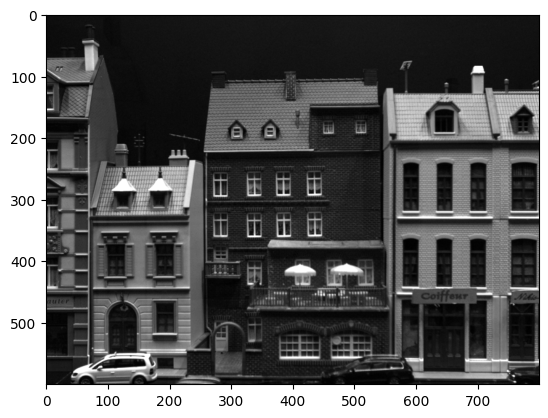

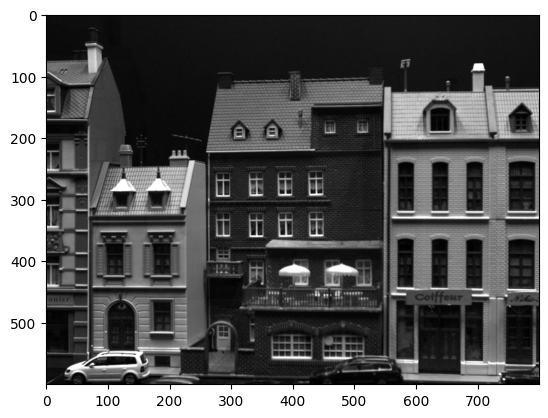

In [49]:
plt.imshow(im1, cmap="gray")
plt.show()
plt.imshow(im2, cmap="gray")
plt.show()

[< cv2.DMatch 00000251741AAD90>, < cv2.DMatch 00000251741AAFD0>, < cv2.DMatch 00000251741AB010>, < cv2.DMatch 00000251655CDA30>, < cv2.DMatch 00000251741AB2D0>, < cv2.DMatch 00000251741ABBD0>, < cv2.DMatch 0000025174210270>, < cv2.DMatch 00000251730F0EB0>, < cv2.DMatch 00000251741ABA70>, < cv2.DMatch 00000251741AB4F0>, < cv2.DMatch 0000025174210A70>, < cv2.DMatch 00000251741AB3F0>, < cv2.DMatch 00000251741AAEB0>, < cv2.DMatch 00000251741AB070>, < cv2.DMatch 00000251741AB830>, < cv2.DMatch 00000251742107B0>, < cv2.DMatch 00000251741AAFB0>, < cv2.DMatch 0000025174210930>, < cv2.DMatch 00000251741AB030>, < cv2.DMatch 00000251741ABF90>, < cv2.DMatch 0000025174210BF0>, < cv2.DMatch 0000025174210890>, < cv2.DMatch 00000251742105D0>, < cv2.DMatch 00000251655CF350>, < cv2.DMatch 00000251741AB710>, < cv2.DMatch 00000251730F0C50>, < cv2.DMatch 0000025174210B70>, < cv2.DMatch 00000251741AB2B0>, < cv2.DMatch 0000025174210090>, < cv2.DMatch 00000251741AB3B0>, < cv2.DMatch 00000251741AAA70>, < cv2.D

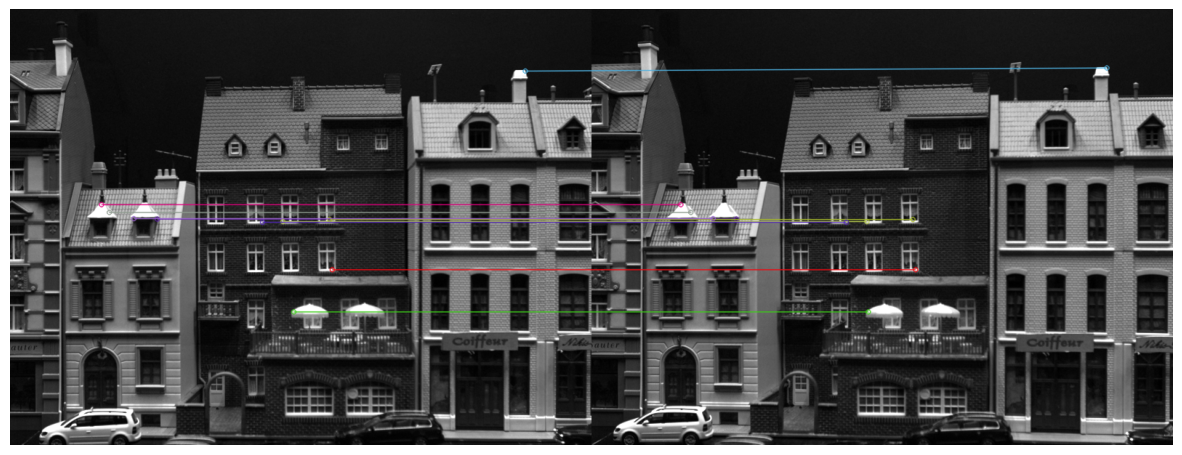

In [57]:
def find_features(im1, im2, plot=False):
    """
    Find matching features between two images.

    Args:
        im1 (np.ndarray): The first image.
        im2 (np.ndarray): The second image.

    Returns:
        matches (list): List of matching features (cv2.DMatch objects).
    """
    # Initiate ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(im1, None)
    kp2, des2 = orb.detectAndCompute(im2, None)

    # Create BFMatcher object
    bf = cv2.BFMatcher(crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)  # ascending

    # Draw first 10 matches.
    if plot:
        img3 = cv2.drawMatches(
            im1,
            kp1,
            im2,
            kp2,
            matches[:10],
            None,
            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
        )
        mpl.rcParams["figure.figsize"] = [15, 10]
        plt.imshow(img3)
        plt.axis("off")
        plt.show()
        mpl.rcParams["figure.figsize"] = [8, 6]

    return matches


# Feature matching is correct when the connecting lines are mostly parallel.
matches = find_features(im1, im2, plot=True)

In [ ]:
def sampsons_distance(F, p1, p2):
    """
    Compute the Sampson distance for the given fundamental matrix and point correspondences.

    Args:
        F (np.ndarray): The fundamental matrix, shape (3, 3).
        p1 (np.ndarray): 2D points in image 1, shape (2, N).
        p2 (np.ndarray): 2D points in image 2, shape (2, N).

    Returns:
        dist (np.ndarray): The Sampson distance for each point, shape (N,).
    """
    if p1.shape[0] == 3 and p2.shape[0] == 3:
        # Normalize points
        p1 = p1[:2] / p1[2]
        p2 = p2[:2] / p2[2]
    if p1.shape[0] != 2 or p2.shape[0] != 2:
        raise ValueError("p1 and p2 must have shape (2, N).")

    # for i in p1.shape[1]:
    #     p1i = p1[:, i]
    #     p2i = p2[:, i]
    #     num = (p1i @ F @ p2i)**2
    #     denom = np.sum((F @ p2i)[:2]**2) + np.sum((F.T @ p1i)[:2]**2)
    #     dist = num / denom

    Fp2 = F @ p2
    Fp1 = F.T @ p1
    num = np.sum(p1 * Fp2, axis=0) ** 2
    denom = np.sum(Fp2[:2] ** 2, axis=0) + np.sum(Fp1[:2] ** 2, axis=0)
    dist = num / denom

    return dist

In [59]:
def ransac_fundamental_matrix(im1, im2, threshold: float, iters=1000):
    """
    Estimate the fundamental matrix using RANSAC.

    Args:
        q1 (np.ndarray): 2D points in image 1, shape (2, N).
        q2 (np.ndarray): 2D points in image 2, shape (2, N).
        threshold (float): The threshold used for the RANSAC algorithm.
        iters (int): The number of iterations to run the RANSAC algorithm.

    Returns:
        F (np.ndarray): The estimated fundamental matrix, shape (3, 3).
        inliers (np.ndarray): The inliers used to estimate F, shape (N,).
    """
    matches = find_features(im1, im2)

    # Initiate ORB detector
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(im1, None)
    kp2, des2 = orb.detectAndCompute(im2, None)

    bf = cv2.BFMatcher(crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    best_inliers = np.zeros((2, 2, 8))
    best_dist = 0
    best_F = np.zeros((3, 3))

    for i in range(iters):
        # 1. sample 8 random matches
        # 2. use Fest_8point to estimate F matrix from the 8 matches
        # 3. compute sampson's distance
        # 4. find inliers if sampson's distance < threshold
        # 5. update best F and inliers
        # 6. iterate

        # Sample 8 random matches
        samples = np.random.choice(matches, 8, replace=False)
        for match in samples:
            p1 = kp1[match.queryIdx].pt
            p2 = kp2[match.trainIdx].pt

        F = Fest_8point(samples[0], samples[1])

        # Calculate the error for each point
        dist_samp = sampsons_distance(F, q1, q2)

        # Find inliers
        inliers = dist_samp < threshold

        # Update best F and inliers
        if dist_samp > best_dist:
            best_dist = dist_samp
            best_inliers[0, :, :] = q1[:, inliers]
            best_inliers[1, :, :] = q2[:, inliers]
            best_F = F

    return best_F, best_inliers


# Estimate F using RANSAC
iters = 200
threshold = 3.84 * 3**2
best_F, best_inliers = ransac_fundamental_matrix(im1, im2, threshold, iters)

F = Fest_8point(best_inliers[0], best_inliers[1])  # ??

# From the exercise
(F * Ftrue).sum() / (np.linalg.norm(F) * np.linalg.norm(Ftrue))

[< cv2.DMatch 00000251730F33D0>, < cv2.DMatch 00000251730F0F90>, < cv2.DMatch 00000251730F2CF0>, < cv2.DMatch 00000251730F2830>, < cv2.DMatch 00000251730F3310>, < cv2.DMatch 00000251730F2970>, < cv2.DMatch 0000025165450730>, < cv2.DMatch 00000251730F34D0>, < cv2.DMatch 00000251730F1AB0>, < cv2.DMatch 00000251730F16D0>, < cv2.DMatch 0000025165452770>, < cv2.DMatch 00000251730F27F0>, < cv2.DMatch 00000251730F0B50>, < cv2.DMatch 00000251730F3370>, < cv2.DMatch 00000251730F06F0>, < cv2.DMatch 00000251655CCB50>, < cv2.DMatch 00000251730F1430>, < cv2.DMatch 0000025165450290>, < cv2.DMatch 00000251730F2930>, < cv2.DMatch 00000251730F0D70>, < cv2.DMatch 000002516564BE10>, < cv2.DMatch 00000251655CFBB0>, < cv2.DMatch 00000251655CD090>, < cv2.DMatch 00000251730F1370>, < cv2.DMatch 00000251730F13D0>, < cv2.DMatch 00000251730F22D0>, < cv2.DMatch 00000251730F13B0>, < cv2.DMatch 00000251730F2F70>, < cv2.DMatch 00000251730F0CD0>, < cv2.DMatch 00000251730F2AB0>, < cv2.DMatch 00000251730F1D50>, < cv2.D

AttributeError: 'cv2.DMatch' object has no attribute 'shape'